In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
startendidxs = np.arange(6,12)
test = np.delete(startendidxs,3)
print(test)
print(startendidxs)

[ 6  7  8 10 11]
[ 6  7  8  9 10 11]


In [ ]:
#all possible combinations of start and end
startendset = ["LPstart","LPend","PYstart","PYend","PDstart","PDend"]
startendidxs = np.arange(6)

allcombos = np.zeros((720,6))
idx = 0

for a in range(6):
    arr1 = np.delete(startendidxs,a)
    for b in range(5):
        arr2 = np.delete(arr1,b)
        for c in range(4):
            arr3 = np.delete(arr2,c)
            for d in range(3):
                arr4 = np.delete(arr3,d)
                for e in range(2):
                    arr5 = np.delete(arr4,e)
                    allcombos[idx] = [startendidxs[a],arr1[b],arr2[c],arr3[d],arr4[e],arr5[0]]
                    idx += 1

In [ ]:
#do we have to eliminate any impossibilities? i don't think so because you can have an end before a start (matter of perspective)

#we could eliminate repeats  which are equivalent to each other up to wrap around
nonequivalentcombos = np.zeros((720,6))

for i in range(len(allcombos)):
    for j in range(6):
        if allcombos[i,j] != 4: #starting at the PDstart (important to follow Prinz paper convention)
            continue
        else:
            test = np.zeros(6)
            for k in range(6):
                test[k] = allcombos[i,(j+k)%6]
            print(allcombos[i],test)
            nonequivalentcombos[i] = test

nonequivalentcombos = np.unique(nonequivalentcombos,axis=0)
print(len(nonequivalentcombos))
#probably is something with 5!... oh well won't think about it 

[0. 1. 2. 3. 4. 5.] [4. 5. 0. 1. 2. 3.]
[0. 1. 2. 3. 5. 4.] [4. 0. 1. 2. 3. 5.]
[0. 1. 2. 4. 3. 5.] [4. 3. 5. 0. 1. 2.]
[0. 1. 2. 4. 5. 3.] [4. 5. 3. 0. 1. 2.]
[0. 1. 2. 5. 3. 4.] [4. 0. 1. 2. 5. 3.]
[0. 1. 2. 5. 4. 3.] [4. 3. 0. 1. 2. 5.]
[0. 1. 3. 2. 4. 5.] [4. 5. 0. 1. 3. 2.]
[0. 1. 3. 2. 5. 4.] [4. 0. 1. 3. 2. 5.]
[0. 1. 3. 4. 2. 5.] [4. 2. 5. 0. 1. 3.]
[0. 1. 3. 4. 5. 2.] [4. 5. 2. 0. 1. 3.]
[0. 1. 3. 5. 2. 4.] [4. 0. 1. 3. 5. 2.]
[0. 1. 3. 5. 4. 2.] [4. 2. 0. 1. 3. 5.]
[0. 1. 4. 2. 3. 5.] [4. 2. 3. 5. 0. 1.]
[0. 1. 4. 2. 5. 3.] [4. 2. 5. 3. 0. 1.]
[0. 1. 4. 3. 2. 5.] [4. 3. 2. 5. 0. 1.]
[0. 1. 4. 3. 5. 2.] [4. 3. 5. 2. 0. 1.]
[0. 1. 4. 5. 2. 3.] [4. 5. 2. 3. 0. 1.]
[0. 1. 4. 5. 3. 2.] [4. 5. 3. 2. 0. 1.]
[0. 1. 5. 2. 3. 4.] [4. 0. 1. 5. 2. 3.]
[0. 1. 5. 2. 4. 3.] [4. 3. 0. 1. 5. 2.]
[0. 1. 5. 3. 2. 4.] [4. 0. 1. 5. 3. 2.]
[0. 1. 5. 3. 4. 2.] [4. 2. 0. 1. 5. 3.]
[0. 1. 5. 4. 2. 3.] [4. 2. 3. 0. 1. 5.]
[0. 1. 5. 4. 3. 2.] [4. 3. 2. 0. 1. 5.]
[0. 2. 1. 3. 4. 5.] [4. 5. 0. 2. 1. 3.]


In [ ]:
np.where((nonequivalentcombos == (5).all(axis=1)))

Really, the criteria are not specific enough to deal with this conception. I'd need to know what the actual biology is behind these choices. Is it important that there is an actual gap?

In [65]:
criteria = np.zeros((120,3))
for i in range(len(nonequivalentcombos)):
    #between LP's start and LP's end,
    j = np.where(nonequivalentcombos[i]==0)[0]+1
    #start by assuming that the PYend is not contained within the LP burst
    criteria[i,1] = 1
    while (j%6 < np.where(nonequivalentcombos[i]==1)[0]):
        if nonequivalentcombos[i,j%6] == 2:
            criteria[i,0] = 1 #LPstart<PYstart
        if nonequivalentcombos[i,j%6] == 3:
            criteria[i,1] = 0 #and turn off if proven false
        j += 1
    if np.where(nonequivalentcombos[i]==5)[0]<np.where(nonequivalentcombos[i]==0)[0]: #PDend < LPstart
        criteria[i,2] = 1
# print(criteria)
print("no criteria met:",np.where((criteria == (0, 0, 0)).all(axis=1))[0])
print("pyloric:",np.where((criteria == (1, 1, 1)).all(axis=1))[0])
print(nonequivalentcombos[np.where((criteria == (1, 1, 1)).all(axis=1))[0]])

no criteria met: [12 13 16 22 50 51 53]
pyloric: [ 57  59  69  91  98 111 115]
[[4. 2. 1. 3. 5. 0.]
 [4. 2. 1. 5. 3. 0.]
 [4. 2. 5. 1. 3. 0.]
 [4. 3. 5. 0. 2. 1.]
 [4. 5. 0. 2. 1. 3.]
 [4. 5. 2. 1. 3. 0.]
 [4. 5. 3. 0. 2. 1.]]


In [66]:
pyloric_archetypes = nonequivalentcombos[np.where((criteria == (1, 1, 1)).all(axis=1))[0]]

In [67]:
pyloriccombos = nonequivalentcombos[np.where((criteria == (1, 1, 1)).all(axis=1))[0]]
for i in range(len(pyloriccombos)):
    for j in range(len(pyloriccombos)):
        if i > j:
            if sum(pyloriccombos[i]==pyloriccombos[j])==4: #if only two things are switched
                unequal = np.where(pyloriccombos[i]!=pyloriccombos[j])[0]
                if abs(unequal[0]-unequal[1])==1:
                    print("switched: ", i+1, ": ",pyloriccombos[i]," ",j+1,": ",pyloriccombos[j]) #and they were next to each other

switched:  2 :  [4. 2. 1. 5. 3. 0.]   1 :  [4. 2. 1. 3. 5. 0.]
switched:  3 :  [4. 2. 5. 1. 3. 0.]   2 :  [4. 2. 1. 5. 3. 0.]
switched:  6 :  [4. 5. 2. 1. 3. 0.]   3 :  [4. 2. 5. 1. 3. 0.]
switched:  7 :  [4. 5. 3. 0. 2. 1.]   4 :  [4. 3. 5. 0. 2. 1.]


In [68]:
restricted_combos = np.zeros((3,6))
j= 0
for i in range(len(pyloriccombos)):
    if np.where(pyloriccombos[i]==0)[0]<np.where(pyloriccombos[i]==2)[0]:
        restricted_combos[j] = pyloriccombos[i]
        j += 1
print(restricted_combos)

[[4. 3. 5. 0. 2. 1.]
 [4. 5. 0. 2. 1. 3.]
 [4. 5. 3. 0. 2. 1.]]


Which startend combos are actually represented in the data set of evolved solutions

In [70]:
all_archetypes = np.zeros((100,6))
for i in range(100):
    ord = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricbursttimes.dat"%i)
    period = ord[-1]
    ord = ord[:-1] % period

    sorted_ord = np.sort(ord)
    print(ord)

    archetype = np.zeros(len((ord)))
    for j in range(len(ord)):
        archetype[j] = np.where(ord == sorted_ord[j])[0]
    
    all_archetypes[i] = archetype
    

[4.29 6.4  5.94 0.64 0.   3.16]
[2.3  3.37 3.02 0.36 0.   1.52]
[1.88 2.64 2.59 0.39 0.   1.23]
[3.58 5.28 4.77 0.63 0.   2.43]
[4.71 7.06 6.75 1.04 0.   3.41]
[3.48 5.2  4.61 0.53 0.   2.41]
[3.62 5.44 5.08 0.88 0.   2.51]
[2.01 2.97 2.62 0.28 0.   1.38]
[2.62 3.95 3.63 0.51 0.   1.81]
[2.76 4.1  3.64 0.43 0.   1.84]
[10.45 15.51 13.9   1.92  0.    7.07]
[2.02 3.03 2.85 0.48 0.   1.42]
[6.08 8.98 8.35 1.25 0.   4.23]
[5.24 7.79 7.35 0.79 0.   3.84]
[4.74 7.1  6.51 0.8  0.   3.36]
[1.69 2.49 2.32 0.15 0.   1.12]
[2.31 3.44 3.2  0.45 0.   1.64]
[4.52 6.64 5.91 0.65 0.   3.09]
[1.71 2.64 2.47 0.16 0.   1.17]
[3.39 5.11 4.87 0.68 0.   2.45]
[1.6  2.32 2.25 0.37 0.   1.06]
[2.65 3.93 3.8  0.57 0.   2.02]
[3.85 5.81 5.41 0.75 0.   2.76]
[3.24 4.76 4.65 0.59 0.   2.37]
[2.12 3.25 3.03 0.4  0.   1.47]
[4.33 6.67 6.12 0.83 0.   3.11]
[3.07 4.54 4.2  0.51 0.   2.13]
[3.37 5.11 4.62 0.57 0.   2.34]
[2.8  4.21 4.07 0.66 0.   2.03]
[2.13 3.22 2.9  0.28 0.   1.5 ]
[2.34 3.48 3.19 0.41 0.   1.64]
[3

In [62]:
print(all_archetypes)
print(np.where((all_archetypes[:] != [4,3,5,0,2,1]).all(axis=1)))

[[4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 1. 2.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0.

In [98]:
plotcolors = ['blue','orange','green']
plotlabels = ['LP','PY','PD']

def drawpyloricarchetype(pyloriccombo):
    for i in range(3):
        start = np.where(pyloriccombo==2*i)[0][0]
        end = np.where(pyloriccombo==(2*i)+1)[0][0]
        ptlist = np.zeros((12,2))
        #determine if end or start comes first
        if (start < end):
            ptlist[0] = np.array([0,0])
            ptlist[1] = np.array([start,0])
            ptlist[2] = np.array([start,1])
            ptlist[3] = np.array([end,1])
            ptlist[4] = np.array([end,0])
            ptlist[5] = np.array([6,0])
            ptlist[6:] = ptlist[0:6]
            ptlist[6:,0] = ptlist[6:,0]+6
        else:
            ptlist[0] = np.array([0,1])
            ptlist[1] = np.array([end,1])
            ptlist[2] = np.array([end,0])
            ptlist[3] = np.array([start,0])
            ptlist[4] = np.array([start,1])
            ptlist[5] = np.array([6,1])
            ptlist[6:] = ptlist[0:6]
            ptlist[6:,0] = ptlist[6:,0]+6
        plt.plot(ptlist[:,0],ptlist[:,1],color=plotcolors[i],alpha=.3,label=plotlabels[i])
    plt.legend()
    plt.show()

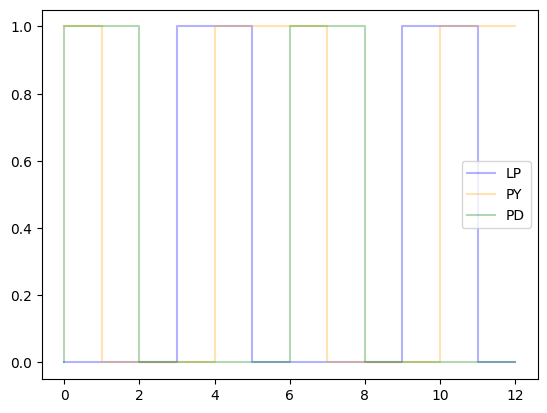

In [99]:
drawpyloricarchetype(np.array([4,3,5,0,2,1]))

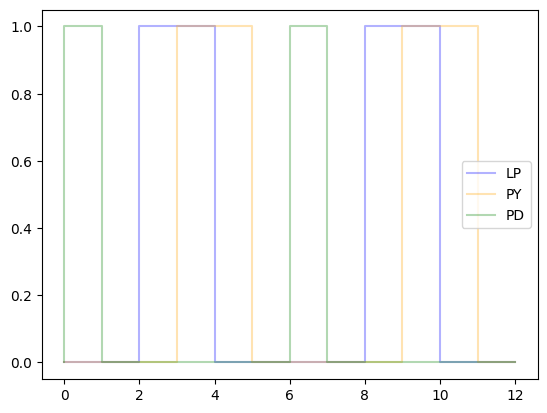

In [101]:
drawpyloricarchetype(np.array([4, 5, 0, 2, 1, 3]))

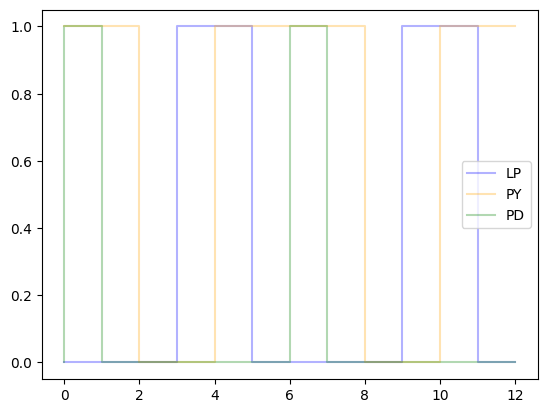

In [102]:
drawpyloricarchetype(np.array([4, 5, 3, 0, 2, 1]))